In [1]:
import torch

### Tensor haqida tushuncha

In [4]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
z = x * y
print(z)

tensor([ 4, 10, 18])


In [7]:
# reshape the tensor with view
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(a.shape)
b = a.view(3, 2)
print(b.shape)

torch.Size([2, 3])
torch.Size([3, 2])


In [10]:
# autogran and backpropagation with pytorch
x = torch.tensor([1.0], requires_grad=True)
y = 2 * x
z = y ** 2
z.backward()
print(x.grad)

tensor([8.])


### Chuqur O'rganish Modeli

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class Tarmog(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # Update the input size based on the output size of the previous layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Update the number of output classes to 10

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool1(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)  # Update the input size based on the output size of the previous layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [32]:
net = Tarmog()

### Modelni shug'ullillantirish

In [33]:
import torch.optim as optim

mezon = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# load data from MNIST
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


In [34]:
# include a list to keep the loss
losses = []

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = mezon(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            losses.append(running_loss / 2000)
            running_loss = 0.0

[1, 2000] loss: 1.0241256276828936
[1, 4000] loss: 0.2460355503887331
[1, 6000] loss: 0.16735284453364146
[1, 8000] loss: 0.13039402501222594
[1, 10000] loss: 0.10972520819490456
[1, 12000] loss: 0.09829520686661544
[1, 14000] loss: 0.08374557416535754
[2, 2000] loss: 0.07563898366075
[2, 4000] loss: 0.07762253147159072
[2, 6000] loss: 0.06710840742936841
[2, 8000] loss: 0.06780615911301402
[2, 10000] loss: 0.05606561964951084
[2, 12000] loss: 0.05572612980902318
[2, 14000] loss: 0.06055729652836226


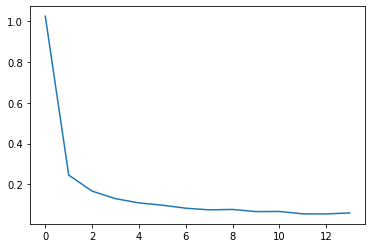

In [35]:
# draw the loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [39]:
from torch.utils.data import DataLoader

# validate the model with test data
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [47]:
len(testset), len(trainset)

(10000, 60000)

In [42]:
# testing the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()


In [44]:
total, correct, correct / total

(10000, 9828, 0.9828)